In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data Set

In [2]:
# Loading the Dataset
data = pd.read_csv(r"\Users\Muhammad\Downloads\Advertising.csv")

# Looking into the Data set

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

# Exploring the data Analysis

In [6]:
data.describe() # returns dtaframe containing basic statics

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
a = data.describe() #returns a dataframe containing basic stats of dataframe

In [8]:
type(a)

pandas.core.frame.DataFrame

In [9]:
b=a.get("TV")

In [10]:
b.get("mean")

147.0425

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
#sns.pairplot??

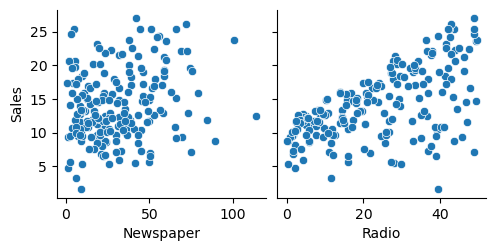

In [13]:
sns.pairplot(data, x_vars=['Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [14]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


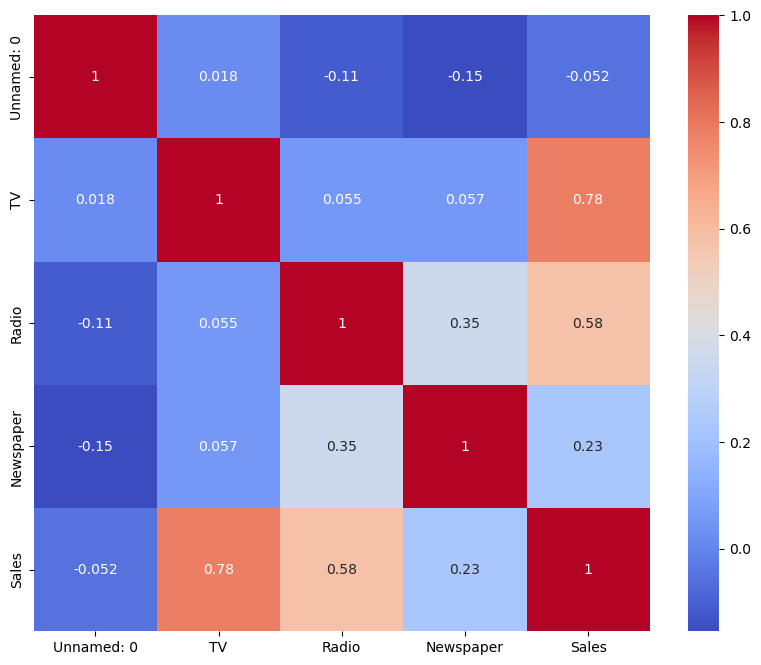

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


# Dataset preperation for the Multiple-linear regression modeling

In [16]:
X=data[['Newspaper','Radio']].values.reshape(-1,2)
Y=data['Sales']

In [17]:
type(X)

numpy.ndarray

In [18]:
X.shape

(200, 2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [20]:
X_train.shape

(140, 2)

# Prepare model data point visualiazation

# Training

In [22]:
#Create a Linear Regression Model
mod = LinearRegression()
model = mod.fit(X,Y)
predicted = model.predict(model_viz)

In [23]:
print(x_pred)

[  0.3          4.22068966   8.14137931  12.06206897  15.98275862
  19.90344828  23.82413793  27.74482759  31.66551724  35.5862069
  39.50689655  43.42758621  47.34827586  51.26896552  55.18965517
  59.11034483  63.03103448  66.95172414  70.87241379  74.79310345
  78.7137931   82.63448276  86.55517241  90.47586207  94.39655172
  98.31724138 102.23793103 106.15862069 110.07931034 114.        ]


# Prediction

In [24]:
# Make predictions on the test set
y_pred = model.predict([[20,30]])

In [25]:
print(y_pred) 

[15.29314177]


In [26]:
# Make predictions on the test set
#y_pred = model.predict(x_test)

# Plotting

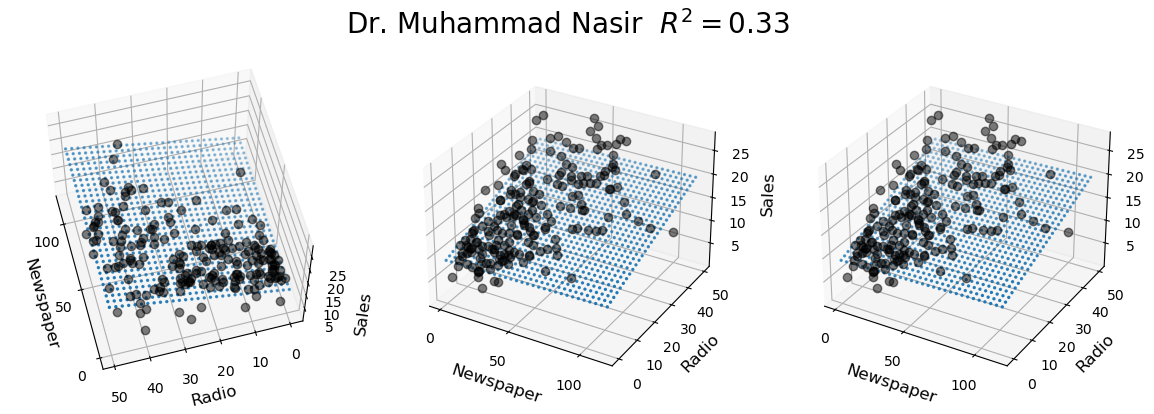

In [27]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x,y,z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=2)
    ax.set_xlabel('Newspaper', fontsize=12)
    ax.set_ylabel('Radio', fontsize=12)
    ax.set_zlabel('Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax1.view_init(elev=4, azim=114)
ax1.view_init(elev=60, azim=165)
r2 = model.score(X,Y)
    
#'    

fig.suptitle('Dr. Muhammad Nasir  '+'$R^2=%.2f$' % r2, fontsize=20)
fig.tight_layout()

# Evaluation

In [28]:
# Evaluating the model (Evaluation meterics MSe, R-Squred, SSE etc...)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60, 1]

In [ ]:
print("Mean Squred Error:", mse)
print("R^2 score:", r2)

# Conclusion

We can find mulitple linear regression in the dataset as well to see its impact/prediction on output variable. In this today's lab practice, we had multiple input variables/features (X/Q), like, TV, Radio, Newspaper that have promotional impact on the output variable 'Sales'. 

In the first practice session, we picked two input features, i.e., TV and Radio to see its relationship with 'Sales'. The plotting of two input and one output variable is easy to visualize.

However, if we choose to find regression with more than three varialbes, its possible to find regression with it, but its not easy to plot it on the graph.

Therefore, in todays session, we found regression with following settings:

1. Input features, x= 'TV' and 'Newspaper' and Y= 'Sales'
2. Input features, x= 'Radio' and 'Newspaper' and Y= 'Sales'


